# Ford GoBike / bike-sharing system - San Francisco Bay area
## by Michael Hasterok

## Investigation Overview


The Ford GoBike data from the San Francisco Bay area bike-sharing system shows us log data of usage processes. From this we can learn something about usage times, user types, frequencies and the resulting relationships.
Above all, however, two main interests should be represented.

> **Who are the users and what differences do they have?**


> **What does the duration and frequency of the bike rental tell us?**



## Dataset Overview

The origiinal file '201902-fordgobike-tripdata.csv' has 183412 entries/rows with 16 columns. The data are from the period February 2019.


The entries show information about the duration:
- duration_sec, start_time, end_time

the bike-sharing stations:
- start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude

the bike:
- bike_id

and the user:
- user_type, member_birth_year, member_gender, bike_share_for_all_trip

> **Who are the users and what differences do they have?**
>- Most of the users are subscribers (91 %).
>- There are 75 % Male users and 23 % are Female users.
>- The average age is 34 years.

> **What does the duration and frequency of the bike rental tell us?**
>- The average duration of use is 10 minutes.
>- At the weekend the number of users is much lower than between Monday and Friday.
>- The most common usage is at 8 and at 17 o'clock.
>- The travel time of the subscriber is always shorter than the travel time of the customer.
>- On average, female travel longer than male.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_bc = pd.read_csv('201902-fordgobike-tripdata_clean2.csv')
df_bc.head(2)

,index,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,member_age,weekday,hour
0,0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,...,-122.402923,4902,Customer,1984,Male,No,869.75,35,3,17
1,2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),...,-122.404904,5905,Customer,1972,Male,No,1030.90,47,3,12


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Who are the users and what differences do they have?



> **Subscriber vs. Customer**

> **Gender distribution.**

> **Age of user.**



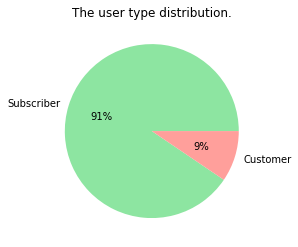

In [3]:
# user type / pie chart
data = list(df_bc['user_type'].value_counts())
labels = df_bc['user_type'].value_counts().index
colors = sb.color_palette('pastel')[2:5]

plt.pie(data, labels=labels, colors = colors, autopct='%.0f%%')
plt.title('The user type distribution.')
plt.show()

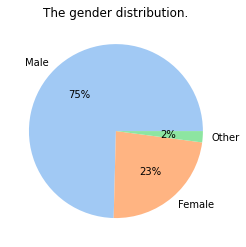

In [4]:
# gender / pie
data = list(df_bc['member_gender'].value_counts())
labels = df_bc['member_gender'].value_counts().index
colors = sb.color_palette('pastel')[0:5]

plt.pie(data, labels=labels, colors = colors, autopct='%.0f%%')
plt.title('The gender distribution.')
plt.show()

Number of users by age. The average age is 34 years.


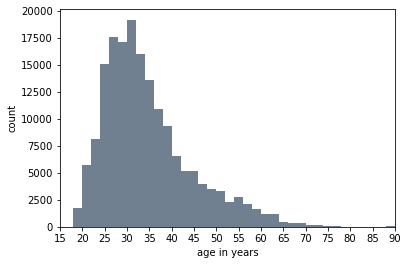

In [5]:
binsize = 2
bins = np.arange(0, df_bc['member_age'].max() + binsize, binsize)
plt.hist(data = df_bc, x = 'member_age', bins = bins, color='slategray')
plt.xlim([15, 90])
plt.xlabel('age in years')
plt.ylabel('count')
ticks = np.arange(15, 95, 5)
labels = ticks
plt.xticks(ticks, labels);


ave_age = df_bc['member_age'].mean()
print('Number of users by age.' ,'The average age is', int(ave_age), 'years.')

## What does the duration and frequency of the bike rental tell us?

> - Duration of the trips.
> - User per weekday and hour.
> - Duration per weekday for user types and member gender.

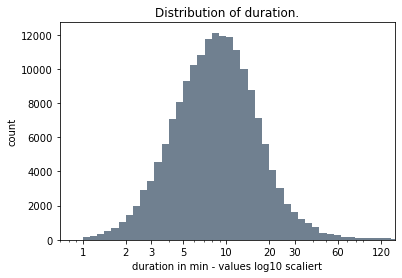

In [6]:
# duration / # there's a very long tail in the distribution, put it on a log scale
binsize = 0.05
bins = 10 ** np.arange(0, np.log10(df_bc['duration_min'].max())+binsize, binsize)
plt.hist(data = df_bc, x = 'duration_min', bins = bins, color='slategray')
plt.xscale('log')
x_scale = [1, 2, 3, 5, 10, 20, 30, 60, 120]
plt.xticks(x_scale, x_scale)
plt.xlim([0,150])
plt.title('Distribution of duration.')
plt.xlabel('duration in min - values log10 scaliert')
plt.ylabel('count')
plt.show();

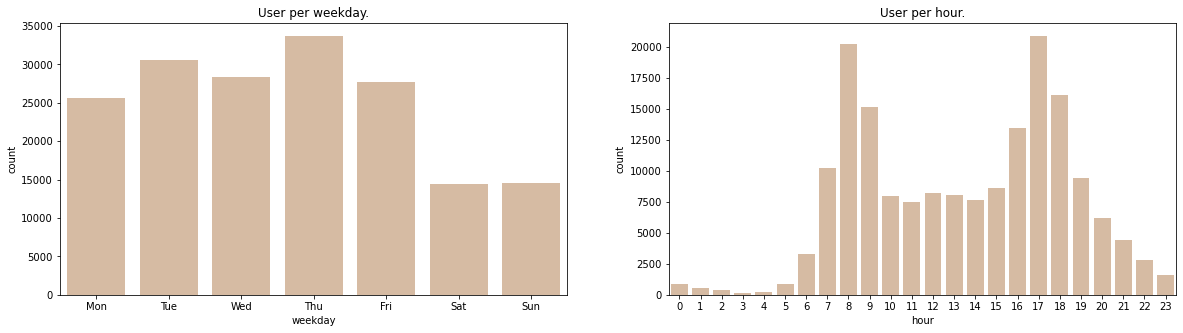

In [7]:
plt.figure(figsize = [20, 5])

# weekday
plt.subplot(1, 2, 1) 
default_color = sb.color_palette('pastel')[5]
sb.countplot(data = df_bc, x = 'weekday', color=default_color)
plt.title('User per weekday.')
bins = np.arange(0, 7, 1)
xlabel = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(bins, xlabel);

# hour
plt.subplot(1, 2, 2)
default_color = sb.color_palette('pastel')[5]
sb.countplot(data = df_bc, x = 'hour', color=default_color)
plt.title('User per hour.');

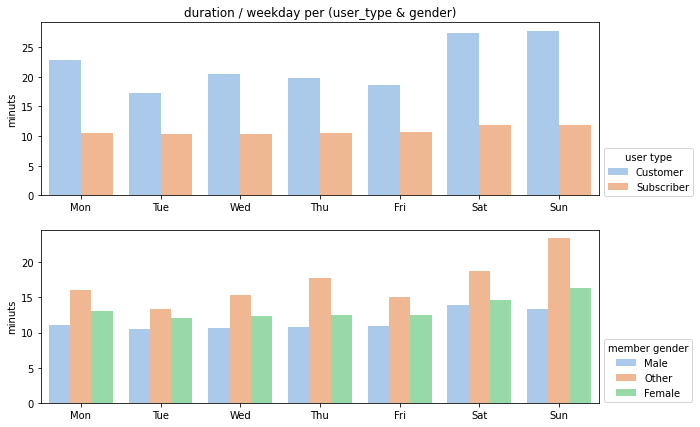

In [8]:
# duration weekday (user_type & gender)

fig, ax = plt.subplots(nrows=2, figsize=[10, 7])

palette = sb.color_palette('pastel')

fig = sb.barplot(data=df_bc, x='weekday', y='duration_min', hue='user_type', palette=palette, ci=None, ax=ax[0])
ax[0].legend(title='user type', loc=2, bbox_to_anchor=(1,0.3))
ax[0].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
ax[0].set(ylabel='minuts')
ax[0].set(title='duration / weekday per (user_type & gender)')
ax[0].set(xlabel=None);

fig = sb.barplot(data=df_bc, x='weekday', y='duration_min', hue='member_gender', palette=palette, ci=None, ax=ax[1])
ax[1].legend(title='member gender', loc=2, bbox_to_anchor=(1,0.4))
ax[1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
ax[1].set(ylabel='minuts')
ax[1].set(xlabel=None);

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
